<h1 style="text-align: center">
<strong>WEB SCRAPING - REPOSITORIO DE UNMSM</strong>
</h1>

**Nombre:** Alex Jesus Flores Taco (20210833)

**Descripción del caso:**
Se quiere obtener información estructurada de las tesis de pregrado y posgrado de Estadística 
Informática o de carreras similares desarrolladas a nivel  nacional, a través de los repositorios 
institucionales de las universidades.

**Especificaciones:**
1. El repositorio escogido es el de la Universidad Nacional Mayor de San Marcos(UNMSM). 
El respectivo url de dicho repositorio es:  http://cybertesis.unmsm.edu.pe/handle/20.500.12672/7/browse?type=dateissued 
**Observación:** Escrapeamos el repositorio de la Facultad de Ciencias Matemáticas listado por fecha de publicación ya que en esta se encuentran la especialidad de estadistica dentro de la UNMSM

In [1]:
# Cargando librerías o módulos pertinentes
import requests
from bs4 import BeautifulSoup
import re
import itertools
import pandas as pd

In [2]:
# Creando una función que permite extraer todas las urls de las páginas que contienen
# las publicaciones encontradas en erespectivo repositorio
def all_pages(url):
    # Descargar el contenido de la página
    page = requests.get(url)
    # Crear un objeto BeautifulSoup a partir del contenido de la página
    soup = BeautifulSoup(page.content, "html.parser")
    # Encontrar el tag a que contiene el url base de las páginas que contienen las publicaciones
    pages = soup.find_all("a", {"class":"next-page-link"})
    # Extraer el url base de las páginas que contienen las publicaciones
    pages_soup = BeautifulSoup(str(pages), 'html.parser')
    a_tags = pages_soup.find_all('a') # find all anchor elements
    base_href = ["http://cybertesis.unmsm.edu.pe/handle/20.500.12672/7/" + a_tag['href'] for a_tag in a_tags][0]
    # Crear lista de límites inferiores de cada url-página
    string_pages = soup.find_all("p", {"class":"pagination-info"})
    matches = re.findall("\d+", str(string_pages[0]))
    lower_limit_max = (max([int(item) for item in matches]) // 20) * 20
    lower_limits = list(range(0, lower_limit_max + 20, 20))
    # Crear lista de urls de cada una de las páginas 
    hrefs_all = [re.sub(r"offset=\d+", "offset=" + str(pag), base_href) for pag in lower_limits]
    return hrefs_all

In [3]:
all_pages('http://cybertesis.unmsm.edu.pe/handle/20.500.12672/7/browse?type=dateissued')

['http://cybertesis.unmsm.edu.pe/handle/20.500.12672/7/browse?rpp=20&sort_by=2&type=dateissued&offset=0&etal=-1&order=ASC',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/7/browse?rpp=20&sort_by=2&type=dateissued&offset=20&etal=-1&order=ASC',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/7/browse?rpp=20&sort_by=2&type=dateissued&offset=40&etal=-1&order=ASC',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/7/browse?rpp=20&sort_by=2&type=dateissued&offset=60&etal=-1&order=ASC',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/7/browse?rpp=20&sort_by=2&type=dateissued&offset=80&etal=-1&order=ASC',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/7/browse?rpp=20&sort_by=2&type=dateissued&offset=100&etal=-1&order=ASC',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/7/browse?rpp=20&sort_by=2&type=dateissued&offset=120&etal=-1&order=ASC',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/7/browse?rpp=20&sort_by=2&type=dateissued&offset=140&etal=-1&order=ASC'

In [4]:
# Creando una función que permite extraer todas las urls de la tabla de datos de las
# publicaciones de una determina página
def links_scrapy(url):
    # Descargar el contenido de la página
    page = requests.get(url)
    # Crear un objeto BeautifulSoup a partir del contenido de la página
    soup = BeautifulSoup(page.content, "html.parser")
    # Encontrar el tag padre de las publicaciones que contiene su respectivo url
    publication = soup.find_all("h4", {"class":"artifact-title"})
    # Extraer los url de los tags hijos respectivos
    publication_soup = BeautifulSoup(str(publication), 'html.parser')
    a_tags = publication_soup.find_all('a') # find all anchor elements
    hrefs = ["http://cybertesis.unmsm.edu.pe" + a_tag['href'] + "?show=full" for a_tag in a_tags]
    return hrefs

In [5]:
links_scrapy('http://cybertesis.unmsm.edu.pe/handle/20.500.12672/7/browse?type=dateissued')

['http://cybertesis.unmsm.edu.pe/handle/20.500.12672/1520?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/15729?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/608?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/2905?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/2674?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/300?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/12786?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/2280?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/2281?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/1749?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/5976?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/12780?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/12779?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/15809?show=full',
 'http://cybertes

In [6]:
### TENER CUIDADO CON AL EJECUCIOND E ESTE CODIGO SON 5769 TESIS Y MI LAPOTP NO AGUANTA

# Extracción de todas las urls de la tabla de datos de todas las
# publicaciones del repositorio
# NOTA: no se recomienda ejecutar esta celda, ya que toma demasiado tiempo obtener una salida
every_page = all_pages('http://cybertesis.unmsm.edu.pe/handle/20.500.12672/7/browse?type=dateissued')
publications_links = list(itertools.chain(*[links_scrapy(url) for url in every_page]))

In [7]:
len(publications_links)

533

In [8]:
publications_links

['http://cybertesis.unmsm.edu.pe/handle/20.500.12672/1520?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/15729?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/608?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/2905?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/2674?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/300?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/12786?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/2280?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/2281?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/1749?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/5976?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/12780?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/12779?show=full',
 'http://cybertesis.unmsm.edu.pe/handle/20.500.12672/15809?show=full',
 'http://cybertes

In [9]:
## CREEAMOS  LISTAS PARA LA VARIABLES QUE DESEAMOS EXTRAER.

headers = {"User-agent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}


años = []
instituciones = []
titulos = []
autores = []
contribuidores = []
grados = []
resumenes = []
diciplinas = []
n = 0
for i in range(len(publications_links)):
    respuesta = requests.get(publications_links[i], headers=headers)
    tabla_tesis = pd.read_html(respuesta.content, encoding = 'utf8')
    tabla_1 = tabla_tesis[0]


    for j in range(len(tabla_1)):
        if tabla_1.iloc[j,0] == 'dc.date.issued':
            año=tabla_1.iloc[j,1]
            años.append(año)
            n = n + 1
    if n == 0:
        años.append(" ")

    else:
        n = 0



    for j in range(len(tabla_1)):
        if tabla_1.iloc[j,0] == 'dc.publisher':
            institucion=tabla_1.iloc[j,1]
            instituciones.append(institucion)
            n = n + 1
    if n == 0:
        instituciones.append(" ")

    else:
        n = 0



    for j in range(len(tabla_1)):        
        if tabla_1.iloc[j,0] == 'dc.title':
            titulo=tabla_1.iloc[j,1]
            titulos.append(titulo)
            n = n + 1
    if n == 0:
            titulos.append(" ")

    else:
        n = 0



    for j in range(len(tabla_1)):
        if tabla_1.iloc[j,0] == 'dc.contributor.author':
            autor=tabla_1.iloc[j,1]
            autores.append(autor)
            n = n + 1
            break
    if n == 0:
            autores.append(" ")

    else:
        n = 0 



    for j in range(len(tabla_1)):
        if tabla_1.iloc[j,0] == 'thesis.degree.name':
            grado=tabla_1.iloc[j,1]
            grados.append(grado)
            n = n + 1
    if n == 0:
            grados.append(" ")

    else:
        n = 0



    for j in range(len(tabla_1)):
        if tabla_1.iloc[j,0] == 'dc.contributor.advisor':
            contribuidor=tabla_1.iloc[j,1]
            contribuidores.append(contribuidor)
            n = n + 1
            break
    if n == 0:
            contribuidores.append(" ")
    else:
        n = 0



    for j in range(len(tabla_1)):
        if tabla_1.iloc[j,0] == 'dc.description.abstract':
            resumen=tabla_1.iloc[j,1]
            resumenes.append(resumen)
            n = n + 1
            break
    if n == 0:
            resumenes.append(" ")
    else:
        n = 0
        
    for j in range(len(tabla_1)):
        if tabla_1.iloc[j,0] == 'thesis.degree.discipline':
            diciplina=tabla_1.iloc[j,1]
            diciplinas.append(diciplina)
            n = n + 1
    if n == 0:
            diciplinas.append(" ")
    else:
        n = 0
        

In [10]:
#creamos un dataframe para poder guardarlos en un archivo csv

df = pd.DataFrame()

df['instituciones'] = instituciones
df['titulos'] = titulos
df['autores'] = autores
df['contribuidores'] = contribuidores
df['resumenes'] = resumenes
df['grados'] = grados
df['años'] = años
df['diciplinas']=diciplinas

In [11]:
#GUARDAMOS LA INFROMACION EN UN ARCHIVO CSV

df.to_csv('UNMSM.csv', index=False)
df

,instituciones,titulos,autores,contribuidores,resumenes,grados,años,diciplinas
0,Universidad Nacional Mayor de San Marcos,La Dualidad en la programación no lineal,"Oré Luján, Luis Alberto",,En el Presente trabajo se estudia el Problema ...,Licenciado en Investigación Operativa,1991,Investigación Operativa
1,Universidad Nacional Mayor de San Marcos,No existencia de soluciones globales débiles p...,"Nuñez Caycho, Rafael","Pérez Arteaga, José del Carmen",Se estudia la no existencia de soluciones glob...,Licenciado en Matemática,1997,Matemática
2,Universidad Nacional Mayor de San Marcos,Estimación por mínimos cuadrados ponderados en...,"Gonzales King-Keé, Karin Cecilia",,En este trabajo se aplica el método de Mínimos...,Licenciado en Estadística,2001,Estadística
3,Universidad Nacional Mayor de San Marcos,Elementos finitos especiales aplicados a probl...,"Timoteo Sánchez, Martha Hilda","Montoro Alegre, Edinson Raúl",En el capitulo I hacemos un resumen de propied...,Licenciada en Matemática,2002,Matemática
4,Universidad Nacional Mayor de San Marcos,Producción y comercialización de truchas en el...,"Yapuchura Sayco, Angélica",,Se trata de la Producción y Comercialización d...,Magíster en Investigación de Operaciones y Sis...,2002,Investigación de Operaciones y Sistemas
...,...,...,...,...,...,...,...,...
528,Universidad Nacional Mayor de San Marcos,Reducción de costos de recolección y transport...,"Astoquillca Yaranga, David Jonathan","Berger Vidal, Esther","Presenta una alternativa diseñada en NetBeans,...",Licenciado en Investigación Operativa,2022,Investigación Operativa
529,Universidad Nacional Mayor de San Marcos,Sistemas dinámicos y tres formas de definir caos,"Azahuanche Falcón, Fiorela","Crisóstomo Parejas, Jorge Luis",Estudia tres formas de definir caos para un si...,Licenciada en Matemática,2022,Matemática
530,Universidad Nacional Mayor de San Marcos,Efecto del tamaño de muestra en los índices de...,"Tarazona Cochachin, Moises Enrique","Huamán Gutiérrez, Zoraida Judith",Determina el efecto del tamaño de muestra en l...,Magíster en Estadística Matemática,2022,Estadística Matemática
531,Universidad Nacional Mayor de San Marcos,Simulación de sistemas aplicada al diseño del ...,"Chipana Loo, Alexandra Sayuri","Berger Vidal, Esther",Desarrolla un Plan Estratégico de Marketing or...,Licenciada en Investigación Operativa,2022,Investigación Operativa


In [12]:
#Hacemos un cuadrado de los grados obtenedos en cada especialidad de la facultad asi como en qeu año se obtenido este


pd.crosstab(index=df['grados'],
            columns=df['años'], margins=True)

años,1991,1997,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,All
grados,,,,,,,,,,,,,,,,,,,,,
Bachiller en Estadística,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
Doctor en Matemática Pura,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,3
Licenciada en Computación Científica,0,0,0,0,0,0,0,0,0,1,...,0,0,2,3,3,2,0,6,1,18
Licenciada en Estadística,0,0,0,0,0,0,3,0,1,3,...,0,0,12,6,1,1,0,8,7,58
Licenciada en Investigación Operativa,0,0,0,0,0,0,0,1,0,6,...,0,0,6,1,7,0,0,12,2,40
Licenciada en Matemática,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,2,1,7,5,25
Licenciado En Estadística,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
Licenciado en Computación,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
Licenciado en Computación Científica,0,0,0,0,1,0,1,0,1,1,...,1,4,5,1,3,2,0,9,3,36


In [13]:
#Hacemos un cuadrado diciplinas de la facultad asi como en qeu año se obtenido este


pd.crosstab(index=df['diciplinas'],
            columns=df['años'], margins=True)

años,1991,1997,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,All
diciplinas,,,,,,,,,,,,,,,,,,,,,
Bioestadística,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,3,3,2,1,14
Ciencias Matemáticas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,3
Computación Científica,0,0,0,0,1,0,1,0,1,2,...,1,4,7,4,7,4,0,15,4,56
Computación e Informática,0,0,0,0,0,0,0,1,0,0,...,0,1,1,4,0,0,2,2,1,14
Computación en Informática,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Estadística,0,0,1,0,3,1,4,0,5,8,...,4,5,22,10,3,4,1,19,14,145
Estadística Matemática,0,0,0,0,0,0,0,0,0,0,...,1,0,2,2,3,1,1,1,2,14
Gerencia Estadística e Informática,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Gerencia en Estadística e Informática,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [14]:
## vemos que variables e pueden obtener datos con la funcion describe

df.describe() 

,instituciones,titulos,autores,contribuidores,resumenes,grados,años,diciplinas
count,533,533,533,533,533,533,533,533
unique,1,531,515,120,533,30,24,21
top,Universidad Nacional Mayor de San Marcos,Análisis situacional del sistema de visitas de...,"Pino Romero, Neisser",,En el Presente trabajo se estudia el Problema ...,Licenciado en Matemática,2021,Estadística
freq,533,2,2,62,1,98,87,145


In [16]:
#Cuantas tesis hay  en cada grado obtenido 
    
tesis={i:grados.count(i) for i in grados}
tesis

{'Licenciado en Investigación Operativa': 56,
 'Licenciado en Matemática': 98,
 'Licenciado en Estadística': 80,
 'Licenciada en Matemática': 25,
 'Magíster en Investigación de Operaciones y Sistemas': 6,
 'Licenciado en Computación Científica': 36,
 'Licenciada en Estadística': 58,
 'Magíster en Estadística': 7,
 'Magíster en Computación en Informática': 1,
 'Magíster en Matemática Pura': 34,
 'Magíster en Computación e Informática': 14,
 'Licenciada en Investigación Operativa': 40,
 'Licenciada en Computación Científica': 18,
 'Licenciado en Matemática Pura': 1,
 'Magíster en Estadística Matemática': 14,
 'Licenciado en Computación': 2,
 'Magíster en Bioestadística': 14,
 'Magíster en Investigación Operativa y Sistemas': 1,
 'Magíster en Gerencia Estadística e Informática': 1,
 'Magíster en Matemática Aplicada con mención en Matemática Computacional': 15,
 'Magíster en Matemática Aplicada': 1,
 'Licenciado en Matemáticas': 1,
 'Magíster en Matemáticas con mención en Matemática Comput

In [33]:
# que porcentaje de las tesis de pregrado y posgrado dela facultad de ciencias matematicas son de estadistica.
# Inicializa una variable para almacenar la suma
suma = 0

# Itera sobre todas las claves del diccionario
for clave in tesis:
    # Si la clave contiene la cadena 'stadí', suma su valor a la variable suma
    if 'Estad' in clave:
        suma += tesis[clave]
        
# Calcula la proporción
proporcion = (suma /sum(tesis.values())) * 100
print("El porcentade de tesis sobre estadistica es de", round(proporcion,2) , "%")

El porcentade de tesis sobre estadistica es de 30.58 %


In [34]:
#Cuantas tesis hay  en cada diciplina 
    
disciplina={i:diciplinas.count(i) for i in diciplinas}
disciplina

{'Investigación Operativa': 95,
 'Matemática': 119,
 'Estadística': 145,
 'Investigación de Operaciones y Sistemas': 7,
 'Computación Científica': 56,
 'Computación en Informática': 1,
 'Matemática Pura': 37,
 'Computación e Informática': 14,
 'Estadística Matemática': 14,
 'Bioestadística': 14,
 'Investigación Operativa y Sistemas': 1,
 'Matemáticas': 5,
 'Gerencia Estadística e Informática': 1,
 'Matemática Aplicada con mención en Matemática Computacional': 15,
 'Matemática Aplicada': 1,
 'Investigación operativa': 1,
 'Ciencias Matemáticas': 3,
 'Matemática con mención en Matemática Computacional': 1,
 'Matemáticas Aplicada con mención en Matemática Computacional': 1,
 'Gerencia en Estadística e Informática': 1,
 'Universidad Nacional Mayor de San Marcos. Facultad de Ciencias Matemáticas. Escuela Profesional de Estadística': 1}

In [30]:
# que porcenta de las disciplinas dela facultad de ciencias matematicas son de estadistica.
# Inicializa una variable para almacenar la suma
suma = 0

# Itera sobre todas las claves del diccionario
for clave in disciplina:
    # Si la clave contiene la cadena 'stadí', suma su valor a la variable suma
    if 'stadís' in clave:
        suma += disciplina[clave]
        
# Calcula la proporción
proporcion = (suma /sum(tesis.values())) * 100
print("El porcentade de tesis con disciplina estadistica es de", round(proporcion,2) , "%")

El porcentade de tesis con disciplina estadistica es de 33.02 %


In [48]:
import matplotlib.pyplot as plt

# Crear una lista con las claves del diccionario
titulos = list(tesis.keys())

# Crear una lista con los valores del diccionario
valores = list(tesis.values())

# Crear el gráfico
plt.bar(volres, titulos)
plt.show()

NameError: name 'volres' is not defined

In [45]:
   
# Crear tres diccionarios vacíos
licenciados = {}
maestrias = {}
doctorados = {}

# Recorrer cada clave del diccionario original
for key in tesis:
  # Si la clave contiene la palabra "licenciado" o "licenciada"
  if "Licenciado" in key or "Licenciada" in key:
    # Agregar la clave y el valor al diccionario de licenciados
    licenciados[key] = tesis[key]
  # Si la clave contiene la palabra "magíster"
  elif "Magíster" in key:
    # Agregar la clave y el valor al diccionario de maestrías
    maestrias[key] = tesis[key]
  # Si la clave contiene la palabra "doctor"
  elif "Doct" in key:
    # Agregar la clave y el valor al diccionario de doctorados
    doctorados[key] = tesis[key]

# Una vez que se haya recorrido todo el diccionario original, los tres diccionarios
# deberían contener solo las claves que cumplen con cada una de las condiciones

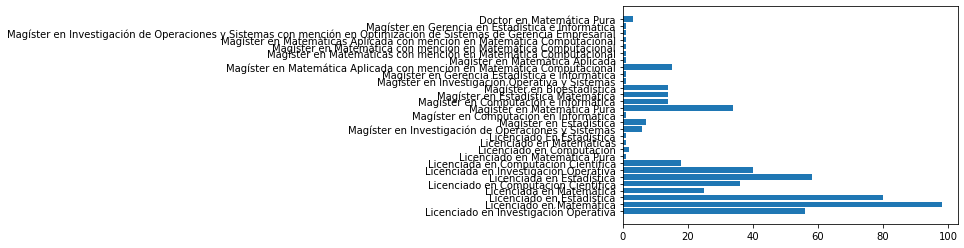

In [47]:
import matplotlib.pyplot as plt

# Crear tres listas con las claves de cada diccionario
titulos_licenciados = list(licenciados.keys())
titulos_maestrias = list(maestrias.keys())
titulos_doctorados = list(doctorados.keys())

# Crear tres listas con los valores de cada diccionario
valores_licenciados = list(licenciados.values())
valores_maestrias = list(maestrias.values())
valores_doctorados = list(doctorados.values())

# Crear una lista con todos los títulos
titulos = titulos_licenciados + titulos_maestrias + titulos_doctorados

# Crear una lista con todos los valores
valores = valores_licenciados + valores_maestrias + valores_doctorados

# Crear el gráfico
plt.barh(titulos, valores)
plt.show()